<center><h2> Jackson Problem 3.20 </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS" by RH Landau, MJ Paez, and CC Bordeianu (deceased). Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2020. Please respect copyright & acknowledge our work."""
<p>
    (Jackson  3.20) A visualization of the potential of a point charge between two horizontal parallel planes:
$$
\Phi(z,\rho)=\frac{q}{\pi\epsilon_0 L}\sum_{n=1}^\infty\sin\Bigl( \frac{n\pi z_0}{L}\Bigr)
\sin\Bigl( \frac{n\pi z}{L}\Bigr)K_0\Bigl( \frac{n\pi \rho}{L}\Bigr)
$$ 

<IPython.core.display.Javascript object>


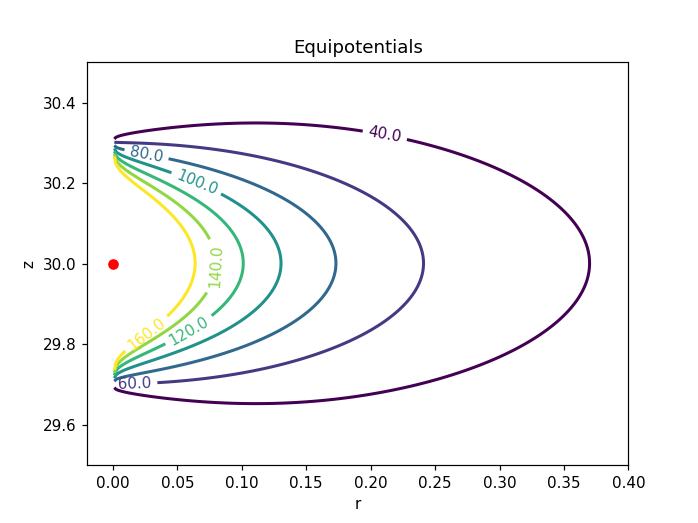

In [1]:
%matplotlib notebook
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

L = 60                  # close to 20*pi, distance between plates
z0 = 30                 # position of charge L/2
m = 400                 # for positions of z, and r
n = 400                 # take e/(pi eps0L) = 1

def potential(r,z):          # Finds the potential at point (r,z)
    summ = 0                   # to sum product
    for n in range(1,200):  # number of terms to find  potential
        ter = n*np.pi/L        # common term in arguments of functions
        s1 = np.sin(ter*z0)    
        s2 = np.sin(ter*z)
        k0 = special.k0(ter*r) #  k0 Modified Bessel Function
        term = s1*s2*k0
        summ = summ+term
    return summ              

y  =  np.arange(29.5,30.5,1/400.)           # z region of interest
x  =  np.arange(0.0001,0.4,0.4/400.)        # r region of interest
X, Y  =  np.meshgrid(x, y) 
Z = potential(X,Y)                      
plt.figure()                              
levels  =  np.arange(40, 180,20)         # range of levels to plot every 2
CS  =  plt.contour(Z,levels,linewidths = 2, extent = (0.001, 0.4, 29.5, 30.5))
plt.clabel(CS, inline = 1, fmt = '%4.1f', fontsize = 10)
plt.xlabel('r')
plt.ylabel('z')
plt.title("Equipotentials")
plt.plot(0.0,z0,'ro')
plt.show()